In [1]:
import pandas as pd 
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('./smartphones_cleaned.csv')

In [3]:
df.head()

,price,rating,brand,dual_display,foldable_display,dual_sim,is_5G,is_NFC,is_VoLTE,is_IRblaster,is_Wifi,processor_name,processor_ghz,processor_core,RAM_GB,ROM,battery_mah,fastcharging_W,is_fastcharging,display_refreshrate,display_notch,main_camera,secondary_camera,third_camera,num_cameras,front_camera,is_card_supported,card_upto,is_card_hybrid,os_type,os_version,processor_version,disply_inches,display_width,display_height
0,54999,89.0,OnePlus,0,0,1,1,1,1,0,1,Snapdragon,3.2,8.0,12,256.0,5000,100.0,1,120.0,Punch Hole,50.0,48,32.0,3,16.0,0,NaN,0,Android,13,8 Gen2,6.70,1440,3216
1,19989,81.0,OnePlus,0,0,1,1,0,1,0,1,Snapdragon,2.2,8.0,6,128.0,5000,33.0,1,120.0,Punch Hole,64.0,2,2.0,3,16.0,1,1024.0,1,Android,12,695,6.59,1080,2412
2,16499,75.0,Samsung,0,0,1,1,0,1,0,1,Exynos,2.4,8.0,4,64.0,5000,15.0,1,90.0,Water Drop Notch,50.0,2,2.0,3,13.0,1,1024.0,0,Android,13,1330,6.60,1080,2408
3,14999,81.0,Motorola,0,0,1,1,0,1,0,1,Snapdragon,2.2,8.0,6,128.0,5000,NaN,1,120.0,Punch Hole,50.0,8,2.0,3,16.0,1,1024.0,1,Android,12,695,6.55,1080,2400
4,24999,82.0,Realme,0,0,1,1,0,1,0,1,Dimensity,2.6,8.0,6,128.0,5000,67.0,1,120.0,Punch Hole,108.0,8,2.0,3,16.0,0,NaN,0,Android,13,1080,6.70,1080,2412


## Basic Analysis

In [4]:
print('number of rows:', df.shape[0])
print('number of columns:', df.shape[1])

number of rows: 931
number of columns: 35


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 931 entries, 0 to 930
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                931 non-null    int64  
 1   rating               851 non-null    float64
 2   brand                931 non-null    object 
 3   dual_display         931 non-null    int64  
 4   foldable_display     931 non-null    int64  
 5   dual_sim             931 non-null    int64  
 6   is_5G                931 non-null    int64  
 7   is_NFC               931 non-null    int64  
 8   is_VoLTE             931 non-null    int64  
 9   is_IRblaster         931 non-null    int64  
 10  is_Wifi              931 non-null    int64  
 11  processor_name       931 non-null    object 
 12  processor_ghz        895 non-null    float64
 13  processor_core       931 non-null    float64
 14  RAM_GB               931 non-null    int64  
 15  ROM                  926 non-null    flo

In [6]:
# secondary camera contained have some uncleaned messy data
df['secondary_camera'] = df['secondary_camera'].str.split(' ').str[0]
df['secondary_camera'] = pd.to_numeric(df['secondary_camera'], errors='coerce')

In [7]:
df.describe()

,price,rating,dual_display,foldable_display,dual_sim,is_5G,is_NFC,is_VoLTE,is_IRblaster,is_Wifi,processor_ghz,processor_core,RAM_GB,ROM,battery_mah,fastcharging_W,is_fastcharging,display_refreshrate,main_camera,secondary_camera,third_camera,num_cameras,front_camera,is_card_supported,card_upto,is_card_hybrid,disply_inches,display_width,display_height
count,931.000000,851.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.0,931.0,895.000000,931.000000,931.000000,926.000000,931.000000,756.000000,931.000000,603.000000,931.000000,541.000000,700.000000,931.000000,901.000000,931.000000,494.000000,931.000000,931.000000,931.000000,931.000000
mean,31646.480129,78.447709,0.250269,0.020408,0.988185,0.569280,0.399570,0.994629,0.0,1.0,2.439453,7.832438,6.644468,138.470842,4863.026853,46.433862,0.879699,111.646766,51.328357,11.333087,8.562000,2.863588,16.524972,0.879699,744.874494,0.164339,6.575038,1082.647691,2233.838883
std,34024.842867,7.318504,0.433400,0.141468,0.108112,0.495443,0.490073,0.073126,0.0,0.0,0.443133,0.728720,2.349404,84.999121,973.832987,34.418147,0.325488,18.469772,31.758562,12.906675,10.667139,0.730058,10.518063,0.325488,374.783254,0.370782,0.250765,288.663551,500.668624
min,3499.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,1.300000,2.000000,4.000000,16.000000,1821.000000,10.000000,0.000000,90.000000,5.000000,2.000000,0.300000,1.000000,5.000000,0.000000,32.000000,0.000000,4.700000,720.000000,720.000000
25%,13477.500000,74.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.0,1.0,2.050000,8.000000,4.000000,64.000000,4500.000000,18.000000,1.000000,90.000000,48.000000,2.000000,2.000000,2.000000,8.000000,1.000000,512.000000,0.000000,6.500000,1080.000000,1920.000000
50%,19990.000000,80.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.0,1.0,2.360000,8.000000,6.000000,128.000000,5000.000000,33.000000,1.000000,120.000000,50.000000,8.000000,2.000000,3.000000,16.000000,1.000000,1024.000000,0.000000,6.580000,1080.000000,2400.000000
75%,34999.000000,84.000000,0.500000,0.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.0,2.840000,8.000000,8.000000,128.000000,5000.000000,66.000000,1.000000,120.000000,64.000000,12.000000,12.000000,3.000000,16.000000,1.000000,1024.000000,0.000000,6.670000,1080.000000,2408.000000
max,480000.000000,89.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.0,3.220000,8.000000,12.000000,512.000000,22000.000000,240.000000,1.000000,240.000000,200.000000,64.000000,64.000000,4.000000,60.000000,1.000000,2048.000000,1.000000,8.030000,2460.000000,3840.000000


In [8]:
print('Total number of missing values:', df.isnull().sum().sum())
print('--'*20)
print('Number of missing values per column:\n')
df.isnull().sum().to_frame().rename(columns={0: 'missing values'})

Total number of missing values: 1802
----------------------------------------
Number of missing values per column:



,missing values
price,0
rating,80
brand,0
dual_display,0
foldable_display,0
dual_sim,0
is_5G,0
is_NFC,0
is_VoLTE,0
is_IRblaster,0


In [9]:
# Check if there are no floating point numbers
print('There are no floating points') if df['rating'].fillna(0).apply(lambda x:x.is_integer()).all() else print('there are floating points')

There are no floating points


### Target variable Analysis

In [28]:
df['price'].describe().to_frame()

,price
count,931.000000
mean,31646.480129
std,34024.842867
min,3499.000000
25%,13477.500000
50%,19990.000000
75%,34999.000000
max,480000.000000


In [56]:
def plot_distribution(data=df, col='price', bins=50, figsize=(10,6), facecolor='lightblue', color='tab:blue'):
    """
    Plot distribution of a Numerical Continous column in the dataset
    default column is target column 'price'
    """
    plt.figure(figsize=figsize,facecolor=facecolor)
    
    plt.subplot(3, 1, 1)
    sns.histplot(df[col], kde=True, bins=bins, 
                 color=color, edgecolor='black',common_bins=bins)

    plt.subplot(3, 1, 2)
    sns.kdeplot(df[col], fill=True, color=color)

    plt.subplot(3, 1, 3)
    sns.boxplot(x=df[col], color=color)

    plt.suptitle(f'{col.title()} Distribution',size=15,
                 weight='bold', fontdict={'font':'serif'},y=1)

    plt.facecolor='lightblue'
    plt.tight_layout()
    plt.show()



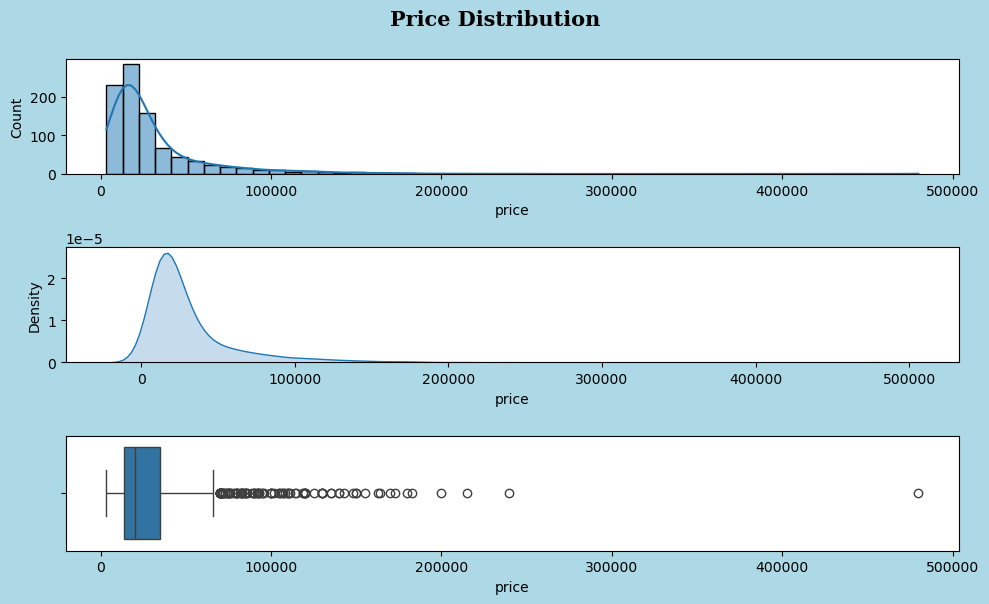

In [57]:
plot_distribution()

- The target distribution is heavly right skewed
- The data contain outliers, one of them is too extreme
- most of the smartphone range price from 10k to 35k

## Univariate analysis

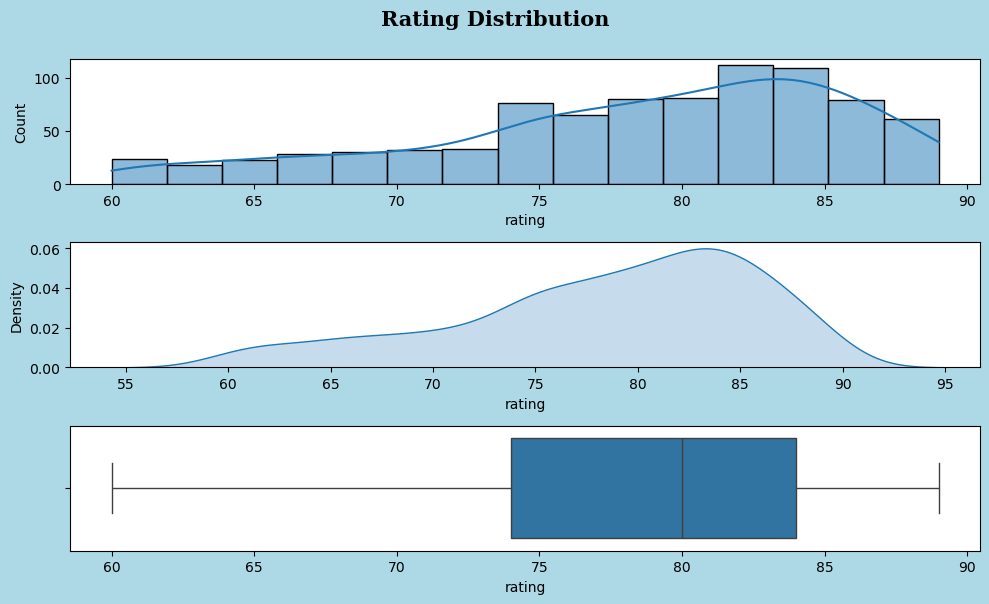

In [60]:
plot_distribution(col='rating',bins=15)

In [63]:
df['rating'].describe().to_frame()

,rating
count,851.000000
mean,78.447709
std,7.318504
min,60.000000
25%,74.000000
50%,80.000000
75%,84.000000
max,89.000000


In [67]:
df['rating'].isnull().sum()

80

In [71]:
df['processor_ghz'].describe().to_frame()

,processor_ghz
count,895.000000
mean,2.439453
std,0.443133
min,1.300000
25%,2.050000
50%,2.360000
75%,2.840000
max,3.220000


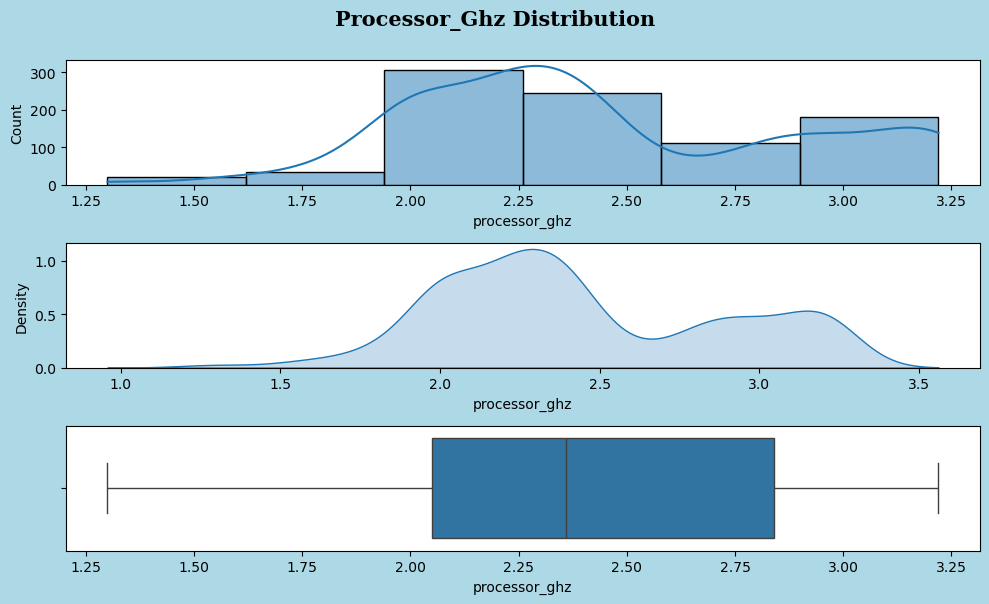

In [77]:
plot_distribution(col='processor_ghz', bins=6)

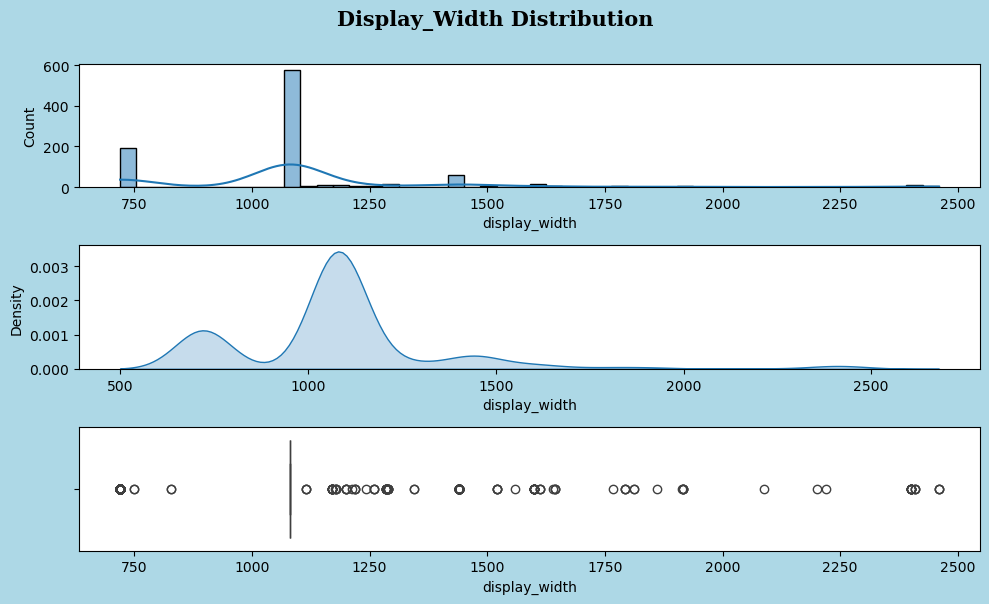

In [79]:
plot_distribution(col='display_width')

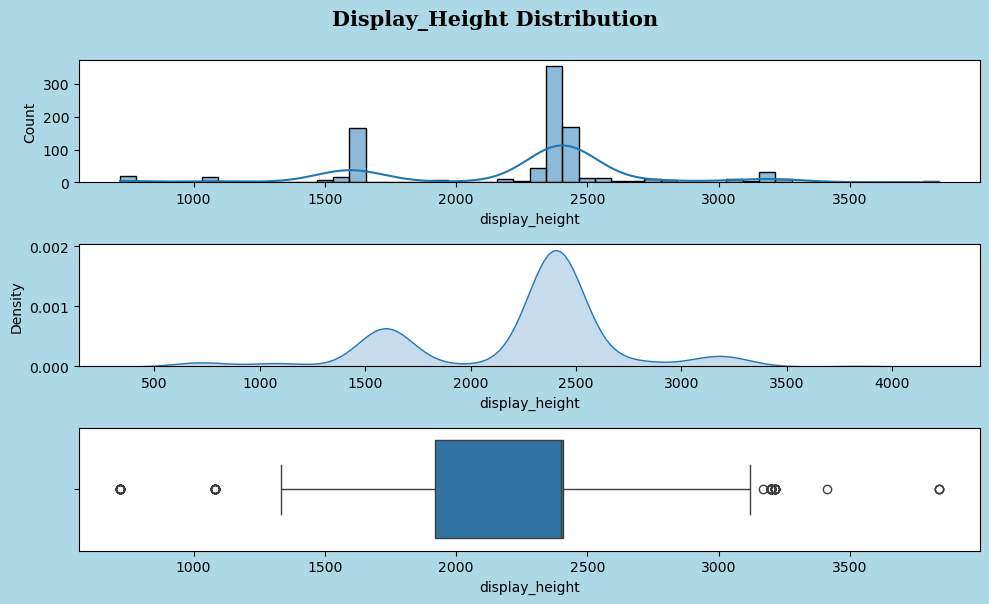

In [81]:
plot_distribution(col='display_height')

In [82]:
df

,price,rating,brand,dual_display,foldable_display,dual_sim,is_5G,is_NFC,is_VoLTE,is_IRblaster,is_Wifi,processor_name,processor_ghz,processor_core,RAM_GB,ROM,battery_mah,fastcharging_W,is_fastcharging,display_refreshrate,display_notch,main_camera,secondary_camera,third_camera,num_cameras,front_camera,is_card_supported,card_upto,is_card_hybrid,os_type,os_version,processor_version,disply_inches,display_width,display_height
0,54999,89.0,OnePlus,0,0,1,1,1,1,0,1,Snapdragon,3.20,8.0,12,256.0,5000,100.0,1,120.0,Punch Hole,50.0,48.0,32.0,3,16.0,0,NaN,0,Android,13,8 Gen2,6.70,1440,3216
1,19989,81.0,OnePlus,0,0,1,1,0,1,0,1,Snapdragon,2.20,8.0,6,128.0,5000,33.0,1,120.0,Punch Hole,64.0,2.0,2.0,3,16.0,1,1024.0,1,Android,12,695,6.59,1080,2412
2,16499,75.0,Samsung,0,0,1,1,0,1,0,1,Exynos,2.40,8.0,4,64.0,5000,15.0,1,90.0,Water Drop Notch,50.0,2.0,2.0,3,13.0,1,1024.0,0,Android,13,1330,6.60,1080,2408
3,14999,81.0,Motorola,0,0,1,1,0,1,0,1,Snapdragon,2.20,8.0,6,128.0,5000,NaN,1,120.0,Punch Hole,50.0,8.0,2.0,3,16.0,1,1024.0,1,Android,12,695,6.55,1080,2400
4,24999,82.0,Realme,0,0,1,1,0,1,0,1,Dimensity,2.60,8.0,6,128.0,5000,67.0,1,120.0,Punch Hole,108.0,8.0,2.0,3,16.0,0,NaN,0,Android,13,1080,6.70,1080,2412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926,34990,83.0,Motorola,0,0,1,1,0,1,0,1,Snapdragon,3.00,8.0,8,128.0,5000,68.0,1,120.0,Punch Hole,64.0,8.0,2.0,3,16.0,1,NaN,0,Android,12,8 Gen1,6.67,1080,2460
927,14990,75.0,Honor,0,0,1,1,0,1,0,1,Snapdragon,2.20,8.0,6,128.0,5000,22.0,1,NaN,Water Drop Notch,48.0,2.0,NaN,3,8.0,1,1024.0,0,Android,11,480+,6.50,720,1600
928,28990,85.0,POCO,0,0,1,1,1,1,0,1,Dimensity,2.85,8.0,8,256.0,5080,67.0,1,144.0,Punch Hole,64.0,8.0,2.0,3,16.0,0,NaN,0,Android,12,8100,6.60,1080,2460
929,19990,80.0,Motorola,0,0,1,1,1,1,0,1,Snapdragon,2.20,8.0,6,128.0,5000,NaN,1,NaN,Punch Hole,108.0,8.0,2.0,3,32.0,1,1024.0,0,Android,12,695,6.80,1080,2400
